# Measuring amplitude 

### George Tzanetakis, University of Victoria 

In this notebook we will explore different ways of measuring the amplitude of a sinusoidal signal. The use of the inner product to estimate the amplitude of a sinusoids in the presence of noise and other sinusoids will also be covered. As usual we start by defining a sinusoid generation function. 


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

# generate a discrete time sinusoidal signal with a specified frequency and duration
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

One way of measuring the amplitude of an audio signal is by finding the maximum value. As long the array of samples contains a few cycles of a sinusoidal signal this estimation works well. 

In [2]:
def peak_amplitude(data): 
    return np.max(data)

Let's check it out: 

In [4]:
freq = 550 
data = sinusoid(freq, 0.5, amp =4.0)
print('Peak amplitude = %2.2f ' % peak_amplitude(data))

Peak amplitude = 4.00 


Now let's define a function that returns the Root of the Mean Squarred (RMS) amplitude. For an array containing a few cycles of a sinusoid signal we can estimate the RMS amplitude as follows: 


In [5]:
def rms_amplitude(data): 
    rms_sum = np.sum(np.multiply(data,data))
    rms_sum /= len(data)
    return np.sqrt(rms_sum) * np.sqrt(2.0)

Let's check out that this method of estimation also works: 

In [7]:
freq = 550 
data = sinusoid(freq, 0.5, amp =8.0)
print('Rms amplitude = %2.2f' %  rms_amplitude(data))

Rms amplitude = 8.00


Now let's look at estimating the amplitude based on taking the dot product of two sinusoids. 
Unlike the peak and RMS methods of estimating amplitude this method requires knowledge of the 
frequency (and possibly phase) of the underlying sinusoid. However, it has the advantage that it is much more robust when there is interferring noise or other sinusoidal signals with other frequencies. 


In [9]:
def dot_amplitude(data1, data2): 
    dot_product = np.dot(data1, data2)
    return 2 * (dot_product / len(data1))

First lets confirm that this amplitude estimation works for a single sinusoid 

Dot product amplitude = 4.00


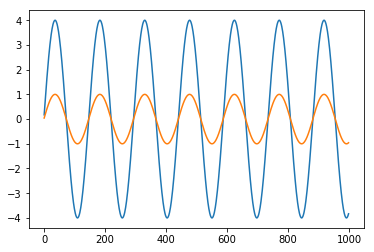

In [10]:
data = sinusoid(300, 0.5, amp =4.0)
basis = sinusoid(300, 0.5, amp = 1)
print('Dot product amplitude = %2.2f' % dot_amplitude(data, basis))
plt.figure() 
plt.plot(data[1:1000])
plt.plot(basis[1:1000])

Now lets add some noise to our signal. Notice that the dot-amplitude estimation works reliably, the RMS still does ok but the peak amplitude gets really affected by the added noise. Notice that the dot product amplitude estimation requires knowledge of the frequency to create the appropriate basis signal 

Dot product amplitude = 3.98
Peak amplitude = 7.64
RMS amplitude = 4.22


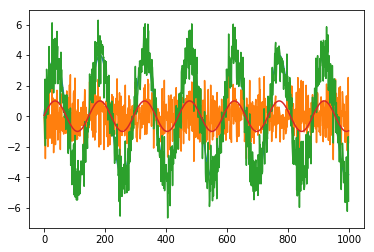

In [11]:
noise = np.random.normal(0, 1.0, len(data))
mix = data + noise 
plt.figure() 
plt.plot(data[1:1000])
plt.plot(noise[1:1000])
plt.plot(mix[1:1000])
plt.plot(basis[1:1000])
print('Dot product amplitude = %2.2f' % dot_amplitude(mix, basis))
print('Peak amplitude = %2.2f' % peak_amplitude(mix))
print('RMS amplitude = %2.2f' % rms_amplitude(mix))

Dot product amplitude = 4.00
Peak amplitude = 6.47
RMS amplitude = 5.00


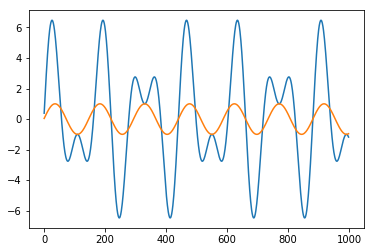

In [17]:
data_other = sinusoid(500, 0.5, amp = 3.0)
mix = data + data_other 
plt.figure()
#plt.plot(data_other[1:1000])
#plt.plot(data[1:1000])
plt.plot(mix[1:1000])
plt.plot(basis[1:1000])
print('Dot product amplitude = %2.2f' % dot_amplitude(mix, basis))
print('Peak amplitude = %2.2f' % peak_amplitude(mix))
print('RMS amplitude = %2.2f' % rms_amplitude(mix))

To summarize, if we know the frequency of the sinusoid we are interested in, we can use the inner product with a sinusoid of the same frequency and phase as a robust way to estimate the amplitude in the presence of interferring noise and/or sinusoidal signals of different frequencies. If we don't know the phase we can use an iterative approach of trying every possible phase and selecting the one that gives the highest amplitude estimate - the brute force approach we talked about in a previous notebook. 

However, there is a simpler approach to estimating both the amplitude and the phase of a sinusoidal signal of known frequency. 

It is based on the following identity: 
\begin{equation} a \sin(x) + b \cos(x) = R \sin (x + \theta) 
\end{equation}
where 
$ R = \sqrt{(a^2 + b^2)} \;\; \text{and} \;\; \theta = \tan^{-1} \frac{b}{a} $

So basically we can represent a sinusoidal signal of a particular amplitude and phase as a weighted sum (with appropriate weights $ a \;\; \text{and}\;\; b$ of a sine signal and a cosine signal. So to estimate the amplitude and phase of a sinusoid of known frequency we can take the inner product with a pair of sine and cosine signals of the same frequncy. Let's see how this would work. We will see later that these pairs of sines and cosine signals are what are called basis functions of the Discrete Fourier Transform. 

Original amplitude  = 3.00
Original phase = 0.79
Estimated Magnitude = 3.00
Estimated Phase = 0.79


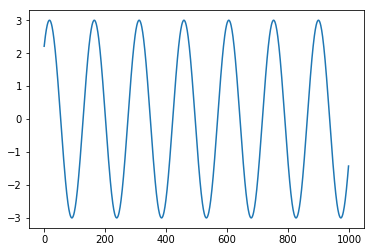

In [14]:
srate = 8000
amplitude = 3.0 
k = 1000 
phase = k * (2 * np.pi / srate)
print('Original amplitude  = %2.2f' % amplitude)
print('Original phase = %2.2f' % phase)

data = sinusoid(300, 0.5, amp =amplitude, phase = phase)
plt.plot(data[1:1000])
basis_sin = sinusoid(300, 0.5, amp = 1)
basis_cos = sinusoid(300, 0.5, amp = 1, phase = np.pi/2)

a = dot_amplitude(data, basis_sin)
b = dot_amplitude(data, basis_cos)
estimated_phase = np.arctan(b/a)
estimated_magnitude = np.sqrt(a*a+b*b)
print('Estimated Magnitude = %2.2f' % estimated_magnitude)
print('Estimated Phase = %2.2f' % estimated_phase)
